In [1]:
!pip install yfinance stable-baselines3 gym numpy pandas matplotlib
!pip install ta-lib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 187.2/187.2 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 60.1 MB/s eta 0:00:00


In [2]:
# 1. Install the yfinance library
!pip install yfinance

# 2. Import necessary libraries
import yfinance as yf
import os
from datetime import datetime

# 3. Define the list of tickers
# Note: United Technologies (UTX) is now Raytheon Technologies (RTX)
tickers = [
    'AAPL', 'AXP', 'BA', 'CAT', 'CSCO', 'CVX', 'DIS', 'DOW', 'GS', 'HD',
    'IBM', 'INTC', 'JNJ', 'JPM', 'KO', 'MCD', 'MMM', 'MRK', 'MSFT', 'NKE',
    'PFE', 'PG', 'TRV', 'UNH', 'RTX', 'V', 'VZ', 'WBA', 'WMT', 'XOM',
    'TSLA', 'AMZN', 'GOOGL'
]

# 4. Define the date range
start_date = '2015-01-01'
end_date = '2025-09-30'

# 5. Create a directory to store the CSV files
output_dir = 'stock_data_csv'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
    print(f"Directory '{output_dir}' created.")

# 6. Loop through tickers to download and save data
print("\nStarting data download...")
for ticker in tickers:
    try:
        # --- THIS IS THE CORRECTED PART ---
        # Use the Ticker object for a clean download
        stock = yf.Ticker(ticker)
        data = stock.history(start=start_date, end=end_date)
        # --------------------------------

        if data.empty:
            print(f"⚠️ No data found for {ticker}, skipping.")
            continue

        # Remove timezone information from the index to prevent issues
        data.index = data.index.tz_localize(None)

        # Drop columns we don't need for the model (optional, but good practice)
        if 'Dividends' in data.columns:
            data = data.drop(columns=['Dividends'])
        if 'Stock Splits' in data.columns:
            data = data.drop(columns=['Stock Splits'])

        # Define the output file path
        file_path = os.path.join(output_dir, f"{ticker}.csv")

        # Save the data to a CSV file
        data.to_csv(file_path)
        print(f"✅ Successfully downloaded and saved {ticker}.csv")

    except Exception as e:
        print(f"❌ Failed to download {ticker}. Error: {e}")

print("\n--- All downloads complete! ---")

Directory 'stock_data_csv' created.

Starting data download...
✅ Successfully downloaded and saved AAPL.csv
✅ Successfully downloaded and saved AXP.csv
✅ Successfully downloaded and saved BA.csv
✅ Successfully downloaded and saved CAT.csv
✅ Successfully downloaded and saved CSCO.csv
✅ Successfully downloaded and saved CVX.csv
✅ Successfully downloaded and saved DIS.csv
✅ Successfully downloaded and saved DOW.csv
✅ Successfully downloaded and saved GS.csv
✅ Successfully downloaded and saved HD.csv
✅ Successfully downloaded and saved IBM.csv
✅ Successfully downloaded and saved INTC.csv
✅ Successfully downloaded and saved JNJ.csv
✅ Successfully downloaded and saved JPM.csv
✅ Successfully downloaded and saved KO.csv
✅ Successfully downloaded and saved MCD.csv
✅ Successfully downloaded and saved MMM.csv
✅ Successfully downloaded and saved MRK.csv
✅ Successfully downloaded and saved MSFT.csv
✅ Successfully downloaded and saved NKE.csv
✅ Successfully downloaded and saved PFE.csv
✅ Successfull

In [4]:
import pandas as pd
import os

# Danh sách các cổ phiếu trong Dow Jones 30
tickers = [
    'AAPL', 'AXP', 'BA', 'CAT', 'CSCO', 'CVX', 'DIS', 'DOW', 'GS', 'HD',
    'IBM', 'INTC', 'JNJ', 'JPM', 'KO', 'MCD', 'MMM', 'MRK', 'MSFT', 'NKE',
    'PFE', 'PG', 'TRV', 'UNH', 'RTX', 'V', 'VZ', 'WBA', 'WMT', 'XOM',
    'TSLA', 'AMZN', 'GOOGL'
]

# ticker of benchmark
benchmark = '^DJI'

# Directory where the CSV files are stored
output_dir = 'stock_data_csv'

# Get the data from the CSV files
stock_data = {}
for ticker in tickers:
    file_path = os.path.join(output_dir, f"{ticker}.csv") # Construct the full file path
    try:
        df = pd.read_csv(file_path, index_col='Date', parse_dates=True)
        stock_data[ticker] = df
    except FileNotFoundError:
        print(f"⚠️ File not found for {ticker} at {file_path}, skipping.")
        continue

# split the data into training, validation and test sets
training_data_time_range = ('2015-01-01', '2019-12-31')
validation_data_time_range = ('2020-01-01', '2022-12-31')
test_data_time_range = ('2023-01-01', '2025-09-30')

training_data = {}
validation_data = {}
test_data = {}

for ticker, df in stock_data.items():
    training_data[ticker] = df.loc[training_data_time_range[0]:training_data_time_range[1]]
    validation_data[ticker] = df.loc[validation_data_time_range[0]:validation_data_time_range[1]]
    test_data[ticker] = df.loc[test_data_time_range[0]:test_data_time_range[1]]

# print shape of training, validation and test data
ticker_to_check = 'AAPL'
if ticker_to_check in training_data:
    print(f'Training data shape for {ticker_to_check}: {training_data[ticker_to_check].shape}')
else:
    print(f'No training data found for {ticker_to_check}')

if ticker_to_check in validation_data:
    print(f'Validation data shape for {ticker_to_check}: {validation_data[ticker_to_check].shape}')
else:
    print(f'No validation data found for {ticker_to_check}')

if ticker_to_check in test_data:
    print(f'Test data shape for {ticker_to_check}: {test_data[ticker_to_check].shape}')
else:
    print(f'No test data found for {ticker_to_check}')


# Display the first 5 rows of the data
if 'AAPL' in stock_data:
    display(stock_data['AAPL'].head())
else:
    print("No data available for AAPL to display.")

Training data shape for AAPL: (1258, 5)
Validation data shape for AAPL: (756, 5)
Test data shape for AAPL: (687, 5)


,Open,High,Low,Close,Volume
Date,,,,,
2015-01-02,24.718171,24.729267,23.821668,24.261044,212818400
2015-01-05,24.030263,24.110150,23.391173,23.577574,257142000
2015-01-06,23.641931,23.839428,23.218089,23.579798,263188400
2015-01-07,23.788387,24.010294,23.677434,23.910437,160423600
2015-01-08,24.238865,24.886832,24.121253,24.829136,237458000


In [5]:
import pandas as pd
import numpy as np

def add_technical_indicators(df):
    # calculate RSI 14
    delta = df['Close'].diff()
    up = delta.where(delta > 0, 0)
    down = -delta.where(delta < 0, 0)
    rs = up.rolling(window=14).mean() / down.rolling(window=14).mean()
    df['RSI'] = 100 - (100 / (1 + rs))

    # Tính toán EMA 12 và 26 kỳ cho MACD
    df['EMA12'] = df['Close'].ewm(span=12, adjust=False).mean()
    df['EMA26'] = df['Close'].ewm(span=26, adjust=False).mean()
    df['MACD'] = df['EMA12'] - df['EMA26']
    df['Signal'] = df['MACD'].ewm(span=9, adjust=False).mean()

    # Tính toán RSI 14 kỳ
    delta = df['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
    rs = gain / loss
    df['RSI'] = 100 - (100 / (1 + rs))

    # Tính toán CCI 20 kỳ
    tp = (df['High'] + df['Low'] + df['Close']) / 3
    sma_tp = tp.rolling(window=20).mean()
    mean_dev = tp.rolling(window=20).apply(lambda x: np.mean(np.abs(x - x.mean())))
    df['CCI'] = (tp - sma_tp) / (0.015 * mean_dev)

    # Tính toán ADX 14 kỳ
    high_diff = df['High'].diff()
    low_diff = df['Low'].diff()
    df['+DM'] = np.where((high_diff > low_diff) & (high_diff > 0), high_diff, 0)
    df['-DM'] = np.where((low_diff > high_diff) & (low_diff > 0), low_diff, 0)
    tr = pd.concat([df['High'] - df['Low'], np.abs(df['High'] - df['Close'].shift(1)), np.abs(df['Low'] - df['Close'].shift(1))], axis=1).max(axis=1)
    atr = tr.ewm(span=14, adjust=False).mean()
    df['+DI'] = 100 * (df['+DM'].ewm(span=14, adjust=False).mean() / atr)
    df['-DI'] = 100 * (df['-DM'].ewm(span=14, adjust=False).mean() / atr)
    dx = 100 * np.abs(df['+DI'] - df['-DI']) / (df['+DI'] + df['-DI'])
    df['ADX'] = dx.ewm(span=14, adjust=False).mean()

    # drop NaN values
    df.dropna(inplace=True)

    # keep Open, High, Low, Close, Volume, MACD, Signal, RSI, CCI, ADX
    df = df[['Open', 'High', 'Low', 'Close', 'Volume', 'MACD', 'Signal', 'RSI', 'CCI', 'ADX']]

    return df

In [28]:
import gymnasium as gym
from gymnasium import spaces
import numpy as np
import pandas as pd

class StockTradingEnv(gym.Env):
    metadata = {'render_modes': ['human']}

    def __init__(self, stock_data):
        super(StockTradingEnv, self).__init__()

        # Remove any empty DataFrames
        self.stock_data = {ticker: df for ticker, df in stock_data.items() if not df.empty}
        self.tickers = list(self.stock_data.keys())

        if not self.tickers:
            raise ValueError("All provided stock data is empty")

        # Determine the number of features per stock
        sample_df = next(iter(self.stock_data.values()))
        self.n_features = len(sample_df.columns)

        # Define action and observation spaces
        self.action_space = spaces.Box(low=-1, high=1, shape=(len(self.tickers),), dtype=np.float32)
        self.obs_shape = self.n_features * len(self.tickers) + 2 + len(self.tickers) + 2
        self.observation_space = spaces.Box(low=-np.inf, high=np.inf, shape=(self.obs_shape,), dtype=np.float32)

        # Initialize account
        self.initial_balance = 1000
        self.balance = self.initial_balance
        self.net_worth = self.initial_balance
        self.max_net_worth = self.initial_balance
        self.shares_held = {ticker: 0 for ticker in self.tickers}
        self.total_shares_sold = {ticker: 0 for ticker in self.tickers}
        self.total_sales_value = {ticker: 0 for ticker in self.tickers}

        # Initialize step
        self.current_step = 0

        # Determine the maximum number of steps based on the shortest stock dataset
        self.max_steps = max(0, min(len(df) for df in self.stock_data.values()) - 1)

    def reset(self, seed=None, options=None):
        super().reset(seed=seed)
        self.balance = self.initial_balance
        self.net_worth = self.initial_balance
        self.max_net_worth = self.initial_balance
        self.shares_held = {ticker: 0 for ticker in self.tickers}
        self.total_shares_sold = {ticker: 0 for ticker in self.tickers}
        self.total_sales_value = {ticker: 0 for ticker in self.tickers}
        self.current_step = 0
        obs = self._next_observation()
        info = {}
        return obs, info  # Gymnasium expects (obs, info) for reset

    def _next_observation(self):
        # Create observation frame
        frame = np.zeros(self.obs_shape)
        idx = 0
        for ticker in self.tickers:
            df = self.stock_data[ticker]
            if self.current_step < len(df):
                frame[idx:idx+self.n_features] = df.iloc[self.current_step].values
            else:
                frame[idx:idx+self.n_features] = df.iloc[-1].values
            idx += self.n_features

        # Append account info
        frame[self.n_features * len(self.tickers)] = self.balance
        frame[self.n_features * len(self.tickers) + 1: self.n_features * len(self.tickers) + 1 + len(self.tickers)] = [self.shares_held[ticker] for ticker in self.tickers]
        frame[-3] = self.net_worth
        frame[-2] = self.max_net_worth
        frame[-1] = self.current_step
        return frame

    def step(self, actions):
        self.current_step += 1

        if self.current_step > self.max_steps:
            obs = self._next_observation()
            reward = 0
            terminated = True
            truncated = False
            info = {}
            return obs, reward, terminated, truncated, info

        current_prices = {}
        for i, ticker in enumerate(self.tickers):
            current_prices[ticker] = self.stock_data[ticker].iloc[self.current_step]['Close']
            # Process the individual action for the current ticker
            action = actions[i] # Access the individual action from the action array

            if action > 0:  # Buy
                shares_to_buy = int(self.balance * action / current_prices[ticker])
                cost = shares_to_buy * current_prices[ticker]
                # Ensure we don't spend more than we have
                if cost <= self.balance:
                    self.balance -= cost
                    self.shares_held[ticker] += shares_to_buy
                else:
                    # Buy as many shares as possible with remaining balance
                    shares_to_buy = int(self.balance / current_prices[ticker])
                    cost = shares_to_buy * current_prices[ticker]
                    self.balance -= cost
                    self.shares_held[ticker] += shares_to_buy

            elif action < 0:  # Sell
                shares_to_sell = int(self.shares_held[ticker] * abs(action))
                # Ensure we don't sell more shares than we hold
                if shares_to_sell <= self.shares_held[ticker]:
                    sale = shares_to_sell * current_prices[ticker]
                    self.balance += sale
                    self.shares_held[ticker] -= shares_to_sell
                    self.total_shares_sold[ticker] += shares_to_sell
                    self.total_sales_value[ticker] += sale
                else:
                    # Sell all held shares
                    shares_to_sell = self.shares_held[ticker]
                    sale = shares_to_sell * current_prices[ticker]
                    self.balance += sale
                    self.shares_held[ticker] -= shares_to_sell
                    self.total_shares_sold[ticker] += shares_to_sell
                    self.total_sales_value[ticker] += sale


        # Update net worth
        self.net_worth = self.balance + sum(self.shares_held[ticker] * current_prices[ticker] for ticker in self.tickers)
        self.max_net_worth = max(self.net_worth, self.max_net_worth)

        reward = self.net_worth - self.initial_balance
        terminated = self.net_worth <= 0 or self.current_step >= self.max_steps
        truncated = False
        obs = self._next_observation()
        info = {}
        return obs, reward, terminated, truncated, info

    def render(self, mode='human'):
        profit = self.net_worth - self.initial_balance
        print(f'Step: {self.current_step}')
        print(f'Balance: {self.balance:.2f}')
        for ticker in self.tickers:
            print(f'{ticker} Shares held: {self.shares_held[ticker]}')
        print(f'Net worth: {self.net_worth:.2f}')
        print(f'Profit: {profit:.2f}')

    def close(self):
        pass

    def update_stock_data(self, new_stock_data):
        """
        Update the environment with new stock data.
        """
        self.stock_data = {ticker: df for ticker, df in new_stock_data.items() if not df.empty}
        self.tickers = list(self.stock_data.keys())

        if not self.tickers:
            raise ValueError("All new stock data is empty")

        sample_df = next(iter(self.stock_data.values()))
        self.n_features = len(sample_df.columns)

        self.obs_shape = self.n_features * len(self.tickers) + 2 + len(self.tickers) + 2
        self.observation_space = spaces.Box(low=-np.inf, high=np.inf, shape=(self.obs_shape,), dtype=np.float32)

        self.max_steps = max(0, min(len(df) for df in self.stock_data.values()) - 1)
        self.reset()
        print(f"Environment updated with {len(self.tickers)} new stocks.")

In [17]:
import numpy as np
from stable_baselines3 import PPO, A2C, DDPG
from stable_baselines3.common.vec_env import DummyVecEnv

# ===============================
# PPO Agent Wrapper
# ===============================
class PPOAgent:
    def __init__(self, env, total_timesteps):
        # Pass the environment directly, it's already wrapped in DummyVecEnv
        self.model = PPO("MlpPolicy", env, verbose=1)
        self.model.learn(total_timesteps=total_timesteps)
        self.env = env # Keep the VecEnv reference

    def predict(self, obs):
        # Ensure batch dimension
        if len(obs.shape) == 1:
            obs = obs[np.newaxis, :]
        action, _ = self.model.predict(obs)
        return action[0]

# ===============================
# A2C Agent Wrapper
# ===============================
class A2CAgent:
    def __init__(self, env, total_timesteps):
        # Pass the environment directly, it's already wrapped in DummyVecEnv
        self.model = A2C("MlpPolicy", env, verbose=1)
        self.model.learn(total_timesteps=total_timesteps)
        self.env = env # Keep the VecEnv reference

    def predict(self, obs):
        if len(obs.shape) == 1:
            obs = obs[np.newaxis, :]
        action, _ = self.model.predict(obs)
        return action[0]

# ===============================
# DDPG Agent Wrapper
# ===============================
class DDPGAgent:
    def __init__(self, env, total_timesteps):
        # Pass the environment directly, it's already wrapped in DummyVecEnv
        self.model = DDPG("MlpPolicy", env, verbose=1)
        self.model.learn(total_timesteps=total_timesteps)
        self.env = env # Keep the VecEnv reference

    def predict(self, obs):
        if len(obs.shape) == 1:
            obs = obs[np.newaxis, :]
        action, _ = self.model.predict(obs)
        return action[0]

# ===============================
# Ensemble Agent
# ===============================
class EnsembleAgent:
    def __init__(self, ppo_agent, a2c_agent, ddpg_agent):
        # These are SB3 models, not the agent wrappers
        self.ppo_model = ppo_agent
        self.a2c_model = a2c_agent
        self.ddpg_model = ddpg_agent

    def predict(self, obs):
        # Get actions from all models (requires passing obs through the model's predict)
        actions = [
            self.ppo_model.predict(obs, deterministic=True)[0], # SB3 predict returns (action, state)
            self.a2c_model.predict(obs, deterministic=True)[0],
            self.ddpg_model.predict(obs, deterministic=True)[0]
        ]
        # Return averaged action
        ensemble_action = np.mean(actions, axis=0)
        return ensemble_action

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Function to create the environment and train the agents
def create_env_and_train_agents(data, total_timesteps):
    # Create the environment using DummyVecEnv with training data
    env = DummyVecEnv([lambda: StockTradingEnv(data)])

    # Train PPO Agent
    ppo_agent = PPOAgent(env, total_timesteps)

    # Train A2C Agent
    a2c_agent = A2CAgent(env, total_timesteps)

    # Train DDPG Agent
    ddpg_agent = DDPGAgent(env, total_timesteps)

    # Train the ensemble agent
    ensemble_agent = EnsembleAgent(ppo_agent.model, a2c_agent.model, ddpg_agent.model)

    return env, ppo_agent, a2c_agent, ddpg_agent

In [12]:
import matplotlib.pyplot as plt

# Function to visualize portfolio changes
def visualize_portfolio(steps, balances, net_worths, shares_held, tickers, show_balance=True, show_net_worth=True, show_shares_held=True):
    fig, axs = plt.subplots(3, figsize=(12, 18))

    # Plot the balance
    if show_balance:
        axs[0].plot(steps, balances, label='Balance')
        axs[0].set_title('Balance Over Time')
        axs[0].set_xlabel('Steps')
        axs[0].set_ylabel('Balance')
        axs[0].legend()

    # Plot the net worth
    if show_net_worth:
        axs[1].plot(steps, net_worths, label='Net Worth', color='orange')
        axs[1].set_title('Net Worth Over Time')
        axs[1].set_xlabel('Steps')
        axs[1].set_ylabel('Net Worth')
        axs[1].legend()

    # Plot the shares held
    if show_shares_held:
        for ticker in tickers:
            axs[2].plot(steps, shares_held[ticker], label=f'Shares Held: {ticker}')
        axs[2].set_title('Shares Held Over Time')
        axs[2].set_xlabel('Steps')
        axs[2].set_ylabel('Shares Held')
        axs[2].legend()

    plt.tight_layout()
    plt.show()

# function to visualize the portfolio net worth
def visualize_portfolio_net_worth(steps, net_worths):
    plt.figure(figsize=(12, 6))
    plt.plot(steps, net_worths, label='Net Worth', color='orange')
    plt.title('Net Worth Over Time')
    plt.xlabel('Steps')
    plt.ylabel('Net Worth')
    plt.legend()
    plt.show()

# function to visualize the multiple portfolio net worths ( same chart )
def visualize_multiple_portfolio_net_worth(steps, net_worths_list, labels):
    plt.figure(figsize=(12, 6))
    for i, net_worths in enumerate(net_worths_list):
        plt.plot(steps, net_worths, label=labels[i])
    plt.title('Net Worth Over Time')
    plt.xlabel('Steps')
    plt.ylabel('Net Worth')
    plt.legend()
    plt.show()

In [31]:
def test_agent(env, agent, stock_data, n_tests=1000, visualize=False):
    """
    Test a single agent and track performance metrics, with an option to visualize the results.

    Parameters:
    - env: The trading environment.
    - agent: The agent to be tested.
    - stock_data: Data for the stocks in the environment.
    - n_tests: Number of tests to run (default: 1000).
    - visualize: Boolean flag to enable or disable visualization (default: False).

    Returns:
    - A dictionary containing steps, balances, net worths, and shares held.
    """
    # Initialize metrics tracking
    metrics = {
        'steps': [],
        'balances': [],
        'net_worths': [],
        'shares_held': {ticker: [] for ticker in stock_data.keys()}
    }

    # Reset the environment before starting the tests
    obs = env.reset()

    for i in range(n_tests):
        metrics['steps'].append(i)
        action = agent.predict(obs)
        # Ensure the action is a 2D array with shape (1, num_actions) for DummyVecEnv
        action = action[np.newaxis, :]
        obs, rewards, dones, infos = env.step(action)
        # Unwrap obs, rewards, dones, infos if env is a DummyVecEnv
        obs, rewards, dones, infos = obs[0], rewards[0], dones[0], infos[0]


        if visualize:
            env.render()

        # Track metrics
        metrics['balances'].append(env.get_attr('balance')[0])
        metrics['net_worths'].append(env.get_attr('net_worth')[0])
        env_shares_held = env.get_attr('shares_held')[0]

        # Update shares held for each ticker
        for ticker in stock_data.keys():
            if ticker in env_shares_held:
                metrics['shares_held'][ticker].append(env_shares_held[ticker])
            else:
                metrics['shares_held'][ticker].append(0)  # Append 0 if ticker is not found

        if dones:
            obs = env.reset()

    return metrics

In [33]:
def test_and_visualize_agents(env, agents, training_data, n_tests=1000):
    metrics = {}
    for agent_name, agent in agents.items():
        print(f"Testing {agent_name}...")
        metrics[agent_name] = test_agent(env, agent, training_data, n_tests=n_tests, visualize=True)
        print(f"Done testing {agent_name}!")

    print('-'*50)
    print('All agents tested!')
    print('-'*50)

    # Extract net worths for visualization
    net_worths = [metrics[agent_name]['net_worths'] for agent_name in agents.keys()]
    steps = next(iter(metrics.values()))['steps']  # Assuming all agents have the same step count for simplicity

    # Visualize the performance metrics of multiple agents
    visualize_multiple_portfolio_net_worth(steps, net_worths, list(agents.keys()))

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def compare_and_plot_agents(agents_metrics, labels):
    # Function to compare returns, standard deviation, and sharpe ratio of agents
    def compare_agents(agents_metrics, labels):
        returns = []
        stds = []
        sharpe_ratios = []

        for metrics in agents_metrics:
            net_worths = np.array(metrics['net_worths'])
            mean_return = np.mean(net_worths)
            std_dev = np.std(net_worths)

            returns.append(mean_return)
            stds.append(std_dev)

            # Calculate Sharpe Ratio, handle division by zero
            if std_dev == 0:
                sharpe_ratios.append(0) # or np.nan, depending on desired behavior
            else:
                sharpe_ratios.append(mean_return / (std_dev + 1e-9)) # Add epsilon for numerical stability

        df = pd.DataFrame({
            'Agent': labels,
            'Return': returns,
            'Standard Deviation': stds,
            'Sharpe Ratio': sharpe_ratios
        })

        return df

    # Compare agents
    df = compare_agents(agents_metrics, labels)
    # Sort the dataframe by sharpe ratio
    df_sorted = df.sort_values(by='Sharpe Ratio', ascending=False)

    # Display the dataframe
    display(df_sorted)

    # Plot bar chart for sharpe ratio
    plt.figure(figsize=(12, 6))
    plt.bar(df_sorted['Agent'], df_sorted['Sharpe Ratio'])
    plt.title('Sharpe Ratio Comparison')
    plt.xlabel('Agent')
    plt.ylabel('Sharpe Ratio')
    plt.show()

Using cuda device


/usr/local/lib/python3.12/dist-packages/stable_baselines3/common/on_policy_algorithm.py:150: UserWarning: You are trying to run PPO on the GPU, but it is primarily intended to run on the CPU when not using a CNN policy (you are using ActorCriticPolicy which should be a MlpPolicy). See https://github.com/DLR-RM/stable-baselines3/issues/1245 for more info. You can pass `device='cpu'` or `export CUDA_VISIBLE_DEVICES=` to force using the CPU.Note: The model will train, but the GPU utilization will be poor and the training might take longer than on CPU.
  warnings.warn(


-----------------------------
| time/              |      |
|    fps             | 211  |
|    iterations      | 1    |
|    time_elapsed    | 9    |
|    total_timesteps | 2048 |
-----------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 200         |
|    iterations           | 2           |
|    time_elapsed         | 20          |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.013231628 |
|    clip_fraction        | 0.175       |
|    clip_range           | 0.2         |
|    entropy_loss         | -46.8       |
|    explained_variance   | 6.24e-05    |
|    learning_rate        | 0.0003      |
|    loss                 | 2.63e+05    |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.0317     |
|    std                  | 0.998       |
|    value_loss           | 6.25e+05    |
----------------------------------

/usr/local/lib/python3.12/dist-packages/stable_baselines3/common/on_policy_algorithm.py:150: UserWarning: You are trying to run A2C on the GPU, but it is primarily intended to run on the CPU when not using a CNN policy (you are using ActorCriticPolicy which should be a MlpPolicy). See https://github.com/DLR-RM/stable-baselines3/issues/1245 for more info. You can pass `device='cpu'` or `export CUDA_VISIBLE_DEVICES=` to force using the CPU.Note: The model will train, but the GPU utilization will be poor and the training might take longer than on CPU.
  warnings.warn(


------------------------------------
| time/                 |          |
|    fps                | 164      |
|    iterations         | 100      |
|    time_elapsed       | 3        |
|    total_timesteps    | 500      |
| train/                |          |
|    entropy_loss       | -46.5    |
|    explained_variance | -0.00539 |
|    learning_rate      | 0.0007   |
|    n_updates          | 99       |
|    policy_loss        | 80.9     |
|    std                | 0.989    |
|    value_loss         | 16.1     |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 167      |
|    iterations         | 200      |
|    time_elapsed       | 5        |
|    total_timesteps    | 1000     |
| train/                |          |
|    entropy_loss       | -46.5    |
|    explained_variance | 0.00484  |
|    learning_rate      | 0.0007   |
|    n_updates          | 199      |
|    policy_loss        | 1.14e+03 |
|

/usr/local/lib/python3.12/dist-packages/stable_baselines3/common/vec_env/base_vec_env.py:259: UserWarning: You tried to call render() but no `render_mode` was passed to the env constructor.
  warnings.warn("You tried to call render() but no `render_mode` was passed to the env constructor.")


Done testing PPO Agent!
Testing A2C Agent...
Done testing A2C Agent!
Testing DDPG Agent...
Done testing DDPG Agent!
--------------------------------------------------
All agents tested!
--------------------------------------------------


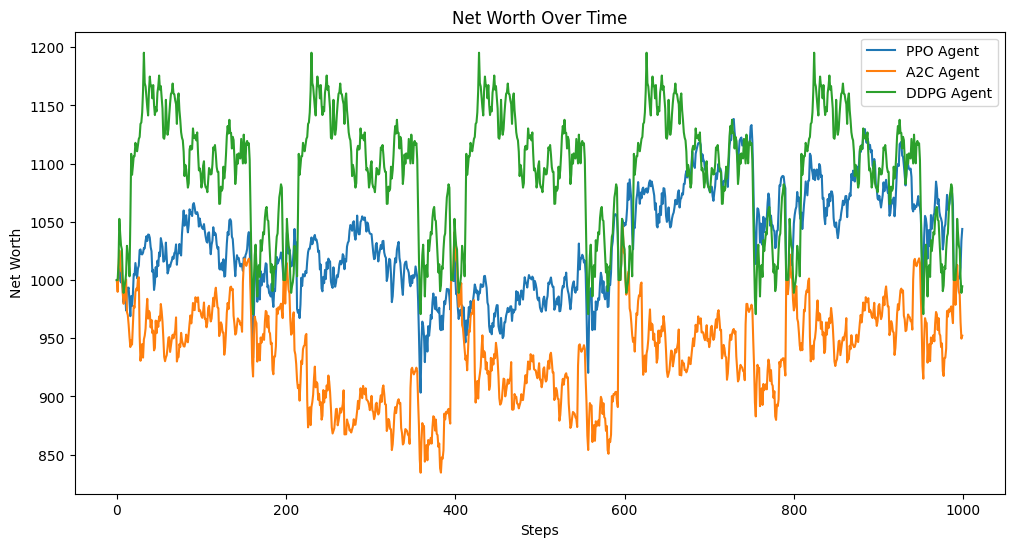

,Agent,Return,Standard Deviation,Sharpe Ratio
0,PPO Agent,1036.895490,35.586798,29.137083
1,A2C Agent,922.162327,43.147003,21.372570
2,DDPG Agent,1092.482135,51.642885,21.154553


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


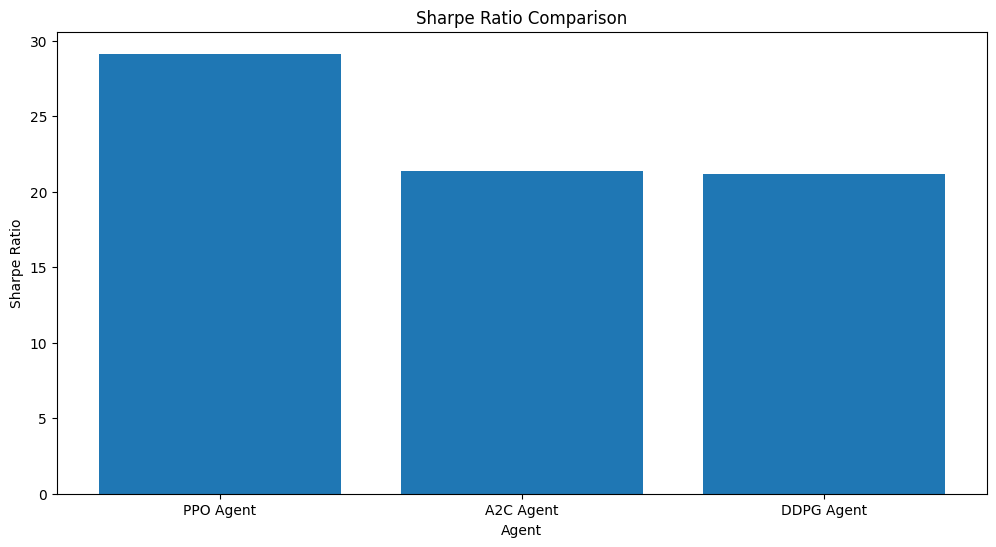

In [36]:
# 1. Create the environment and train the agents
total_timesteps = 10000
env, ppo_agent, a2c_agent, ddpg_agent = create_env_and_train_agents(training_data, total_timesteps)

# 2. Test & visualize the agents
n_tests = 1000
agents = {
    'PPO Agent': ppo_agent,
    'A2C Agent': a2c_agent,
    'DDPG Agent': ddpg_agent,

}
test_and_visualize_agents(env, agents, training_data, n_tests=n_tests)

# 3. Compare the agents' performance ( returns, standard deviation, and sharpe ratio )
agents_metrics = [test_agent(env, agent, training_data, n_tests=n_tests, visualize=False) for agent in agents.values()]
compare_and_plot_agents(agents_metrics, list(agents.keys()))

Testing PPO Agent...


/usr/local/lib/python3.12/dist-packages/stable_baselines3/common/vec_env/base_vec_env.py:259: UserWarning: You tried to call render() but no `render_mode` was passed to the env constructor.
  warnings.warn("You tried to call render() but no `render_mode` was passed to the env constructor.")


Done testing PPO Agent!
Testing A2C Agent...
Done testing A2C Agent!
Testing DDPG Agent...
Done testing DDPG Agent!
--------------------------------------------------
All agents tested!
--------------------------------------------------


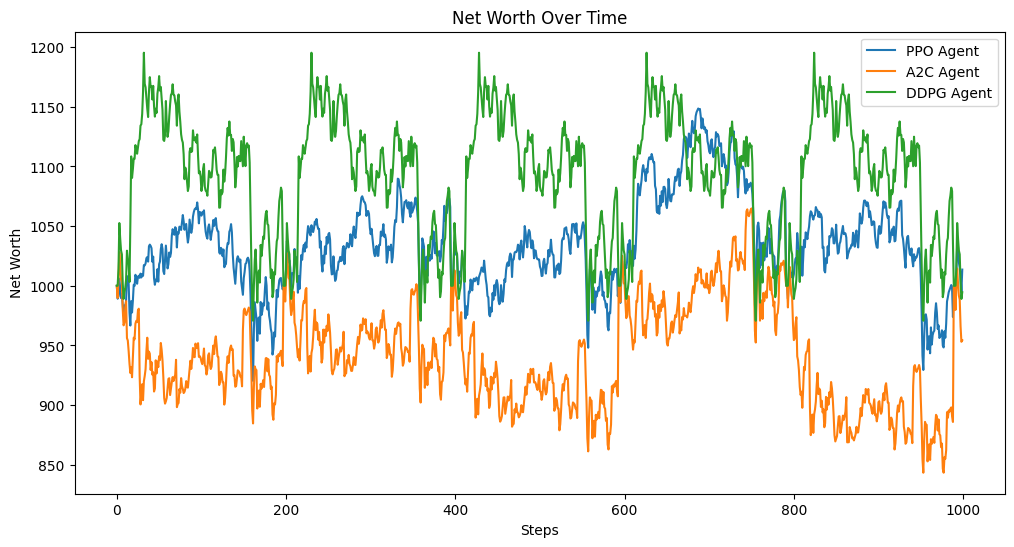

,Agent,Return,Standard Deviation,Sharpe Ratio
1,A2C Agent,908.120302,34.049754,26.670393
0,PPO Agent,1027.313523,42.950700,23.918435
2,DDPG Agent,1092.482135,51.642885,21.154553


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


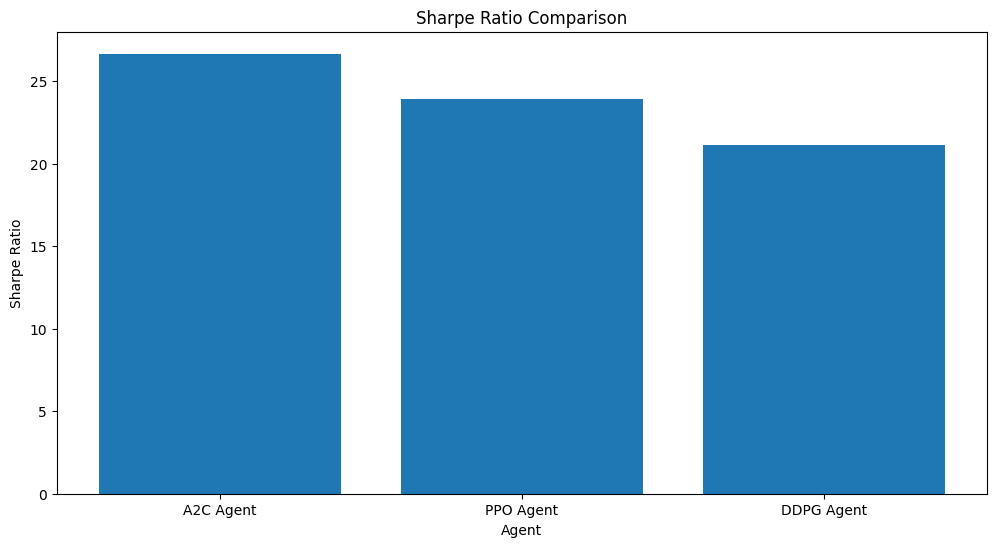

In [37]:
# Create the environment using DummyVecEnv with test data
test_env = DummyVecEnv([lambda: StockTradingEnv(test_data)])

# 2. Test & visualize the agents on the test data
n_tests = 1000
test_agents = {
    'PPO Agent': ppo_agent,
    'A2C Agent': a2c_agent,
    'DDPG Agent': ddpg_agent,

}
test_and_visualize_agents(env, test_agents, test_data, n_tests=n_tests)

# 3. Compare the agents' performance on the test data ( returns, standard deviation, and sharpe ratio )
test_agents_metrics = [test_agent(env, agent, test_data, n_tests=n_tests, visualize=False) for agent in test_agents.values()]
compare_and_plot_agents(test_agents_metrics, list(test_agents.keys()))

Testing PPO Agent...


/usr/local/lib/python3.12/dist-packages/stable_baselines3/common/vec_env/base_vec_env.py:259: UserWarning: You tried to call render() but no `render_mode` was passed to the env constructor.
  warnings.warn("You tried to call render() but no `render_mode` was passed to the env constructor.")


Done testing PPO Agent!
Testing A2C Agent...
Done testing A2C Agent!
Testing DDPG Agent...
Done testing DDPG Agent!
--------------------------------------------------
All agents tested!
--------------------------------------------------


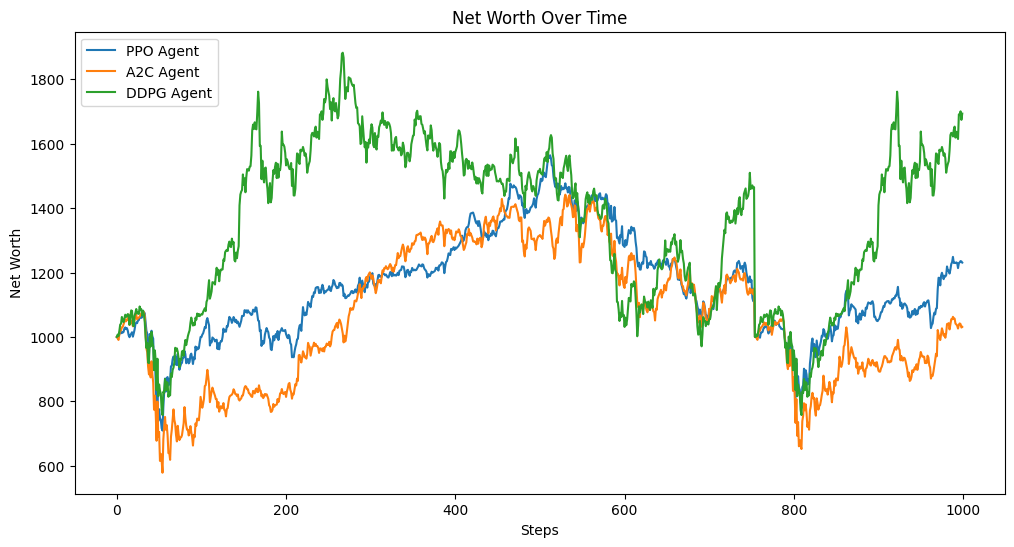

,Agent,Return,Standard Deviation,Sharpe Ratio
0,PPO Agent,1043.578344,118.754003,8.787732
1,A2C Agent,1101.655217,199.420597,5.524280
2,DDPG Agent,1349.584620,257.239443,5.246414


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


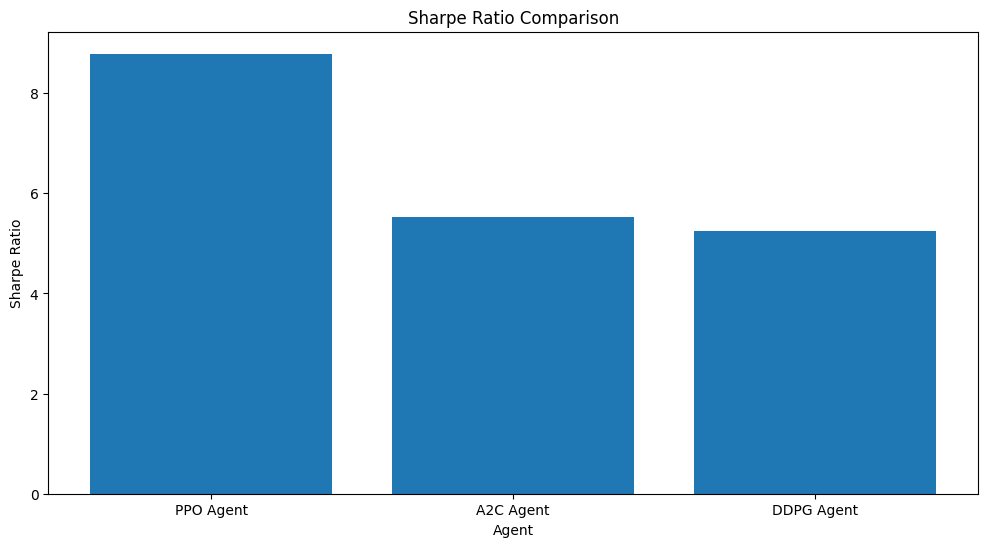

In [38]:
# create validation environment
validation_env = DummyVecEnv([lambda: StockTradingEnv(validation_data)])

# test the agents on the validation data
n_tests = 1000
validation_agents = {
    'PPO Agent': ppo_agent,
    'A2C Agent': a2c_agent,
    'DDPG Agent': ddpg_agent,

}
test_and_visualize_agents(validation_env, validation_agents, validation_data, n_tests=n_tests)


validation_agents_metrics = [test_agent(validation_env, agent, validation_data, n_tests=n_tests, visualize=False) for agent in validation_agents.values()]
# compare the agents' performance on the validation data
compare_and_plot_agents(validation_agents_metrics, list(validation_agents.keys()))